Data was downloaded from Kaggle:

https://www.kaggle.com/datasets/gyanprakashkushwaha/samsung-mobiles-latest-dataset/data

# Samsung Mobiles Latest Dataset: Comprehensive Information on Model Names, Ratings, Prices, and More!

### Description:

Welcome to the Samsung Mobiles Latest Dataset, a comprehensive collection of Samsung smartphones providing valuable insights into Samsung's cutting-edge range of mobile devices. This dataset is a result of meticulous web scraping from trusted sources, including official Samsung websites and reputable online retailers.

### Dataset Overview:

The dataset comprises ten key columns that shed light on Samsung mobiles' essential attributes:

name: Names of various Samsung smartphone models, showcasing the diversity and variety of offerings.
ratings: User ratings and reviews associated with each model, reflecting customer satisfaction and feedback.
price: Prices of the Samsung mobiles, helping users understand the affordability and value proposition of each device.
imgURL: Image URLs corresponding to each model, facilitating visual exploration and comparison.
storage_ram: Details about the storage capacity and RAM configuration for each device, crucial for storage-intensive applications.
os_processor: Operating system and processor details, essential for assessing device performance and capabilities.
camera: Information about the camera specifications, catering to photography enthusiasts and content creators.
display: Display-related specifications, such as size, resolution, and technology, offering insights into the visual experience provided by each Samsung mobile.
battery: Battery-related specifications, including capacity and endurance, vital factors for heavy users and on-the-go productivity.

### Acknowledgment:

This dataset acknowledges the efforts of numerous websites and sources that provided the data. As responsible data practitioners, we respect their terms of use and ensure the data is utilized for non-commercial and educational purposes only.

### Note:

This dataset is static and represents a snapshot of Samsung mobiles available at the time of scraping. As the mobile industry evolves rapidly, newer models and updated information may not be included. Users are encouraged to verify and cross-reference data with official Samsung sources before making any critical decisions.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

In [2]:
#Load the data
samsung = pd.read_csv('samsung.csv')

### Checking data 

In [3]:
samsung.head()

,name,ratings,price,imgURL,camera,display,battery,storage,ram,processor,android_version
0,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",4.3,9499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,64,4,not mentioned,12
1,"SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,128,4,not mentioned,12
2,"SAMSUNG Galaxy F13 (Nightsky Green, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,128,4,not mentioned,12
3,"SAMSUNG Galaxy F13 (Sunrise Copper, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,128,4,not mentioned,12
4,"SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)",4.3,15499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,5000,128,6,Snapdragon750GProcessor,12


In [4]:
samsung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             407 non-null    object 
 1   ratings          407 non-null    float64
 2   price            407 non-null    int64  
 3   imgURL           407 non-null    object 
 4   camera           407 non-null    int64  
 5   display          407 non-null    object 
 6   battery          407 non-null    int64  
 7   storage          407 non-null    int64  
 8   ram              407 non-null    int64  
 9   processor        407 non-null    object 
 10  android_version  407 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 35.1+ KB


Dataset has 407 rows and 11 columns, no missing values.

### Data Cleaning and EDA

In [5]:
# Checking if there are duplicated rows
samsung.duplicated().sum()

0

In [6]:
# Drop URL column (I do not need this column for my analysis)
sams = samsung.drop(['imgURL'], axis=1)
sams.head()

,name,ratings,price,camera,display,battery,storage,ram,processor,android_version
0,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",4.3,9499,50,other_types,6000,64,4,not mentioned,12
1,"SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)",4.3,10499,50,other_types,6000,128,4,not mentioned,12
2,"SAMSUNG Galaxy F13 (Nightsky Green, 128 GB)",4.3,10499,50,other_types,6000,128,4,not mentioned,12
3,"SAMSUNG Galaxy F13 (Sunrise Copper, 128 GB)",4.3,10499,50,other_types,6000,128,4,not mentioned,12
4,"SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)",4.3,15499,50,other_types,5000,128,6,Snapdragon750GProcessor,12


In [7]:
sams.tail()

,name,ratings,price,camera,display,battery,storage,ram,processor,android_version
402,"SAMSUNG Galaxy M40 (Seawater Blue, 128 GB)",4.5,21490,32,other_types,3500,128,6,not mentioned,9
403,"SAMSUNG Galaxy A30s (Prism Crush Violet, 64 GB)",4.3,16199,25,other_types,4000,64,4,not mentioned,12
404,"SAMSUNG Galaxy J4 Plus (Black, 32 GB)",4.4,9000,13,other_types,3300,32,2,Snapdragon425P,8
405,"SAMSUNG Galaxy M01s (Gray, 32 GB)",4.2,10999,13,other_types,4000,32,3,MediaTek,9
406,"SAMSUNG Galaxy S22 (Pink Gold, 128 GB)",4.2,20463,50,other_types,3700,128,8,not mentioned,12


In [8]:
import re

In [9]:
#Thiago's version
#sams['name'].str.replace(r'(.*)\s\((.*)\,.*',r'\1|\2', regex=True).str.split('|', expand=True)

In [10]:
# Removing the storage size from the column name because it is redundant

sams_model = sams['name'].str.replace('\,\s\w.+','', regex=True)
sams_model

0           SAMSUNG Galaxy F13 (Sunrise Copper
1           SAMSUNG Galaxy F13 (Waterfall Blue
2           SAMSUNG Galaxy F13 (Nightsky Green
3           SAMSUNG Galaxy F13 (Sunrise Copper
4             SAMSUNG Galaxy F23 5G (Aqua Blue
                        ...                   
402          SAMSUNG Galaxy M40 (Seawater Blue
403    SAMSUNG Galaxy A30s (Prism Crush Violet
404              SAMSUNG Galaxy J4 Plus (Black
405                  SAMSUNG Galaxy M01s (Gray
406              SAMSUNG Galaxy S22 (Pink Gold
Name: name, Length: 407, dtype: object

In [11]:
# Spliting name into 2 columns - model and color
sams_modcol = sams_model.str.split('\s\(', expand=True)
sams_modcol

,0,1
0,SAMSUNG Galaxy F13,Sunrise Copper
1,SAMSUNG Galaxy F13,Waterfall Blue
2,SAMSUNG Galaxy F13,Nightsky Green
3,SAMSUNG Galaxy F13,Sunrise Copper
4,SAMSUNG Galaxy F23 5G,Aqua Blue
...,...,...
402,SAMSUNG Galaxy M40,Seawater Blue
403,SAMSUNG Galaxy A30s,Prism Crush Violet
404,SAMSUNG Galaxy J4 Plus,Black
405,SAMSUNG Galaxy M01s,Gray


In [12]:
# Assigning names to columns
sams_modcol = sams_modcol.set_axis(['model', 'color'], axis=1)
sams_modcol

,model,color
0,SAMSUNG Galaxy F13,Sunrise Copper
1,SAMSUNG Galaxy F13,Waterfall Blue
2,SAMSUNG Galaxy F13,Nightsky Green
3,SAMSUNG Galaxy F13,Sunrise Copper
4,SAMSUNG Galaxy F23 5G,Aqua Blue
...,...,...
402,SAMSUNG Galaxy M40,Seawater Blue
403,SAMSUNG Galaxy A30s,Prism Crush Violet
404,SAMSUNG Galaxy J4 Plus,Black
405,SAMSUNG Galaxy M01s,Gray


In [13]:
# Concatenating dataframes

df_sams = pd.concat([sams_modcol, sams], axis=1)
df_sams

,model,color,name,ratings,price,camera,display,battery,storage,ram,processor,android_version
0,SAMSUNG Galaxy F13,Sunrise Copper,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",4.3,9499,50,other_types,6000,64,4,not mentioned,12
1,SAMSUNG Galaxy F13,Waterfall Blue,"SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)",4.3,10499,50,other_types,6000,128,4,not mentioned,12
2,SAMSUNG Galaxy F13,Nightsky Green,"SAMSUNG Galaxy F13 (Nightsky Green, 128 GB)",4.3,10499,50,other_types,6000,128,4,not mentioned,12
3,SAMSUNG Galaxy F13,Sunrise Copper,"SAMSUNG Galaxy F13 (Sunrise Copper, 128 GB)",4.3,10499,50,other_types,6000,128,4,not mentioned,12
4,SAMSUNG Galaxy F23 5G,Aqua Blue,"SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)",4.3,15499,50,other_types,5000,128,6,Snapdragon750GProcessor,12
...,...,...,...,...,...,...,...,...,...,...,...,...
402,SAMSUNG Galaxy M40,Seawater Blue,"SAMSUNG Galaxy M40 (Seawater Blue, 128 GB)",4.5,21490,32,other_types,3500,128,6,not mentioned,9
403,SAMSUNG Galaxy A30s,Prism Crush Violet,"SAMSUNG Galaxy A30s (Prism Crush Violet, 64 GB)",4.3,16199,25,other_types,4000,64,4,not mentioned,12
404,SAMSUNG Galaxy J4 Plus,Black,"SAMSUNG Galaxy J4 Plus (Black, 32 GB)",4.4,9000,13,other_types,3300,32,2,Snapdragon425P,8
405,SAMSUNG Galaxy M01s,Gray,"SAMSUNG Galaxy M01s (Gray, 32 GB)",4.2,10999,13,other_types,4000,32,3,MediaTek,9


In [14]:
# Removing column 'name' from the new dataframe
df_sams = df_sams.drop(['name'], axis=1)
df_sams.head()

,model,color,ratings,price,camera,display,battery,storage,ram,processor,android_version
0,SAMSUNG Galaxy F13,Sunrise Copper,4.3,9499,50,other_types,6000,64,4,not mentioned,12
1,SAMSUNG Galaxy F13,Waterfall Blue,4.3,10499,50,other_types,6000,128,4,not mentioned,12
2,SAMSUNG Galaxy F13,Nightsky Green,4.3,10499,50,other_types,6000,128,4,not mentioned,12
3,SAMSUNG Galaxy F13,Sunrise Copper,4.3,10499,50,other_types,6000,128,4,not mentioned,12
4,SAMSUNG Galaxy F23 5G,Aqua Blue,4.3,15499,50,other_types,5000,128,6,Snapdragon750GProcessor,12


In [15]:
df_sams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   model            407 non-null    object 
 1   color            407 non-null    object 
 2   ratings          407 non-null    float64
 3   price            407 non-null    int64  
 4   camera           407 non-null    int64  
 5   display          407 non-null    object 
 6   battery          407 non-null    int64  
 7   storage          407 non-null    int64  
 8   ram              407 non-null    int64  
 9   processor        407 non-null    object 
 10  android_version  407 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 35.1+ KB


In [16]:
# Number of unique phone models 
number_models = len(df_sams['model'].unique())
number_models

111

### Processor

In [17]:
# Imputing processor model to "not mentioned" 

In [18]:
# Function to find amount of missing processor information. This is one way to filter the data according to the column model - This time I want to know the number
# of rows with processor missing.

def missing_processor():

    missing_proc = []

    for index, row in df_sams.iterrows():
        if row['processor'] == 'not mentioned':
            missing_proc.append(row['model'])

    print(len(missing_proc))

In [19]:
missing_processor()

274


We have 274 values missing for processor in this dataset

In [20]:
#This is another way to filter the missing processor data, but here I want
# a table containing unique models with processor information missing

df_mp = df_sams.loc[df_sams['processor'] == 'not mentioned',['model','processor']]
df_mp.drop_duplicates(inplace = True)
df_mp

,model,processor
0,SAMSUNG Galaxy F13,not mentioned
6,SAMSUNG Galaxy F04,not mentioned
8,SAMSUNG Galaxy F14 5G,not mentioned
17,SAMSUNG Galaxy M33 5G,not mentioned
19,SAMSUNG Galaxy M04,not mentioned
...,...,...
389,SAMSUNG Galaxy Note 20,not mentioned
390,SAMSUNG Galaxy S20+,not mentioned
393,SAMSUNG Galaxy J7 Prime,not mentioned
402,SAMSUNG Galaxy M40,not mentioned


 There are 85 models that have the processor information missing out of 111 unique models of phone.

In [21]:
# Export the list of missing processors to csv
df_mp.to_csv('missing_processor.csv')

I looked for the processor missing information and noticed that except by two phone models using quad-core technology (SAMSUNG Galaxy Core Prime and SAMSUNG Galaxy J3 Pro) and one using one core (SAMSUNG Galaxy Duos), all the other models rely on octa-core CPU and different chipset models. For the purpose of inputation and standardization, I am considering all the missing processors as octa-core (except the ones that I mentioned before that have a older kind of processor). I am going to remove these 3 old models processors from the list.

In [22]:
# Drop 3 models old versions of processor from the list

df_sams = df_sams[df_sams['model'].str.contains('SAMSUNG Galaxy duos|SAMSUNG Galaxy core prime|SAMSUNG Galaxy J3 Pro') == False]
df_sams

,model,color,ratings,price,camera,display,battery,storage,ram,processor,android_version
0,SAMSUNG Galaxy F13,Sunrise Copper,4.3,9499,50,other_types,6000,64,4,not mentioned,12
1,SAMSUNG Galaxy F13,Waterfall Blue,4.3,10499,50,other_types,6000,128,4,not mentioned,12
2,SAMSUNG Galaxy F13,Nightsky Green,4.3,10499,50,other_types,6000,128,4,not mentioned,12
3,SAMSUNG Galaxy F13,Sunrise Copper,4.3,10499,50,other_types,6000,128,4,not mentioned,12
4,SAMSUNG Galaxy F23 5G,Aqua Blue,4.3,15499,50,other_types,5000,128,6,Snapdragon750GProcessor,12
...,...,...,...,...,...,...,...,...,...,...,...
402,SAMSUNG Galaxy M40,Seawater Blue,4.5,21490,32,other_types,3500,128,6,not mentioned,9
403,SAMSUNG Galaxy A30s,Prism Crush Violet,4.3,16199,25,other_types,4000,64,4,not mentioned,12
404,SAMSUNG Galaxy J4 Plus,Black,4.4,9000,13,other_types,3300,32,2,Snapdragon425P,8
405,SAMSUNG Galaxy M01s,Gray,4.2,10999,13,other_types,4000,32,3,MediaTek,9


In [23]:
# Replace 'not mentioned' processor information by processor models.

df_sams['processor'] = df_sams['processor'].replace(to_replace='not mentioned', value='Octa-core')
df_sams.head()

,model,color,ratings,price,camera,display,battery,storage,ram,processor,android_version
0,SAMSUNG Galaxy F13,Sunrise Copper,4.3,9499,50,other_types,6000,64,4,Octa-core,12
1,SAMSUNG Galaxy F13,Waterfall Blue,4.3,10499,50,other_types,6000,128,4,Octa-core,12
2,SAMSUNG Galaxy F13,Nightsky Green,4.3,10499,50,other_types,6000,128,4,Octa-core,12
3,SAMSUNG Galaxy F13,Sunrise Copper,4.3,10499,50,other_types,6000,128,4,Octa-core,12
4,SAMSUNG Galaxy F23 5G,Aqua Blue,4.3,15499,50,other_types,5000,128,6,Snapdragon750GProcessor,12


In [24]:
#Checking if there is any information about processor missing in our data set
missing_processor()

0


### Other features

In [25]:
# Storage sizes (all in GB according to dataset source)

storage_sizes = df_sams['storage'].unique()
print(np.sort(storage_sizes))

[  1   8  16  32  64 128 256 512]


In [26]:
# RAM (all in MB according to dataset source)

memory_ram = df_sams['ram'].unique()
print(np.sort(memory_ram))

[ 1  2  3  4  6  8 12]


In [27]:
# Battery capacity in mAh 

battery_capacity = df_sams['battery'].unique()
print(np.sort(battery_capacity))

[2600 3000 3300 3500 3600 3700 3900 4000 4300 4400 4500 4700 5000 6000
 7000]


### Ratings and prices

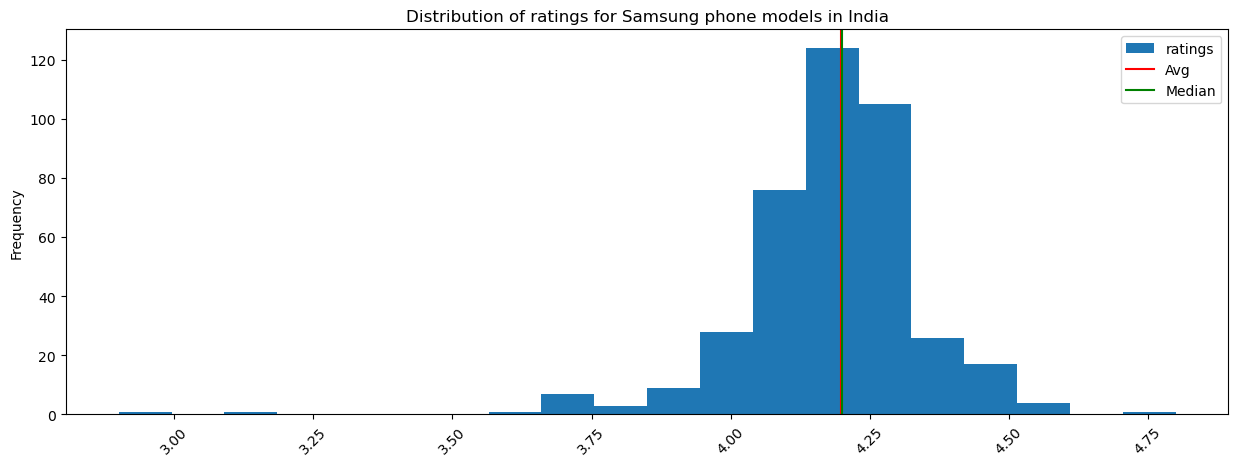

In [28]:
# Ratings distribution

df_sams['ratings'].plot(kind="hist", bins = 20, figsize=(15, 5))
plt.title("Distribution of ratings for Samsung phone models in India")
plt.ylabel("Frequency")
plt.axvline(df_sams['ratings'].mean(), color='red', label='Avg')
plt.axvline(df_sams['ratings'].median(), color='green', label='Median')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [29]:
# Checking the min and max values for 'Reviewer_Score'
max_rev = df_sams['ratings'].max()
min_rev = df_sams['ratings'].min()

print('Ratings ranges from ', min_rev, 'to', max_rev)

Ratings ranges from  2.9 to 4.8


In [30]:
# Phone models with ratings above 4.5 and their price

model_rating = df_sams.loc[df_sams['ratings'] >= 4.5,['model','ratings','price']]
model_rating.drop_duplicates(inplace = True)
model_rating.sort_values(by='ratings', ascending = False)

,model,ratings,price
276,SAMSUNG Galaxy A12,4.8,14999
243,SAMSUNG Galaxy A10s,4.6,9490
358,SAMSUNG Galaxy M01,4.6,8999
385,SAMSUNG Galaxy A31,4.6,23999
56,SAMSUNG Galaxy S23 Plus 5G,4.5,29463
88,SAMSUNG Galaxy S23 5G,4.5,14463
89,SAMSUNG Galaxy S23 5G,4.5,9463
163,SAMSUNG Galaxy J6,4.5,9999
184,SAMSUNG Galaxy A12,4.5,13999
355,SAMSUNG Galaxy J2 2018,4.5,8200


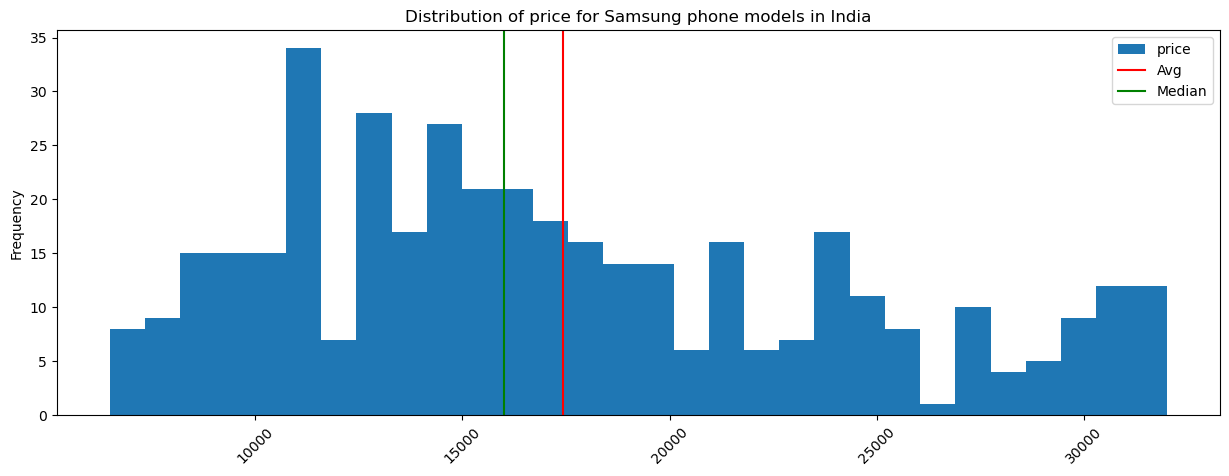

In [31]:
# Price distribution

df_sams['price'].plot(kind="hist", bins = 30, figsize=(15, 5))
plt.title("Distribution of price for Samsung phone models in India")
plt.ylabel("Frequency")
plt.axvline(df_sams['price'].mean(), color='red', label='Avg')
plt.axvline(df_sams['price'].median(), color='green', label='Median')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [32]:
# Top 10 phone models with highest prices and their ratings

model_price = df_sams.loc[df_sams['price'] >= 30000,['model','price','ratings']]
model_price.drop_duplicates(inplace = True)
model_price.sort_values(by='price', ascending = False).head(10)

,model,price,ratings
384,SAMSUNG Galaxy A70s,32000,4.3
120,SAMSUNG Galaxy A53,31999,4.1
278,SAMSUNG Galaxy A52,31999,4.3
33,SAMSUNG Galaxy S21 FE 5G,31999,4.3
100,SAMSUNG Galaxy A53,31999,4.0
79,SAMSUNG Galaxy F62,31999,4.3
253,SAMSUNG Galaxy A53,31999,4.2
125,SAMSUNG Galaxy A34 5G,31990,4.0
341,SAMSUNG Galaxy A70s,31000,4.3
348,SAMSUNG Galaxy A70s,31000,4.2


### Phone colors

In [33]:
# Number of unique colors

number_colors = len(df_sams['color'].unique())
number_colors

110

In [34]:
# Function to categorize colors

def color_category(color):
    
    color = color.lower()
    color = color.split(' ') 
    
    if 'gold' in color: 
        return 'metallic'
    elif 'silver' in color: 
        return 'metallic'
    elif 'copper' in color: 
        return 'metallic'
    elif 'yellow' in color:
        return 'yellow'
    elif 'blue' in color: 
        return 'blue'
    elif 'pink' in color: 
        return 'pink'
    elif 'violet' in color: 
        return 'purple'
    elif 'purple' in color: 
        return 'purple'
    elif 'green' in color: 
        return 'green'
    elif 'mint' in color:
        return 'green'
    elif 'peach' in color: 
        return 'rose'
    elif 'rose' in color: 
        return 'rose'
    elif 'red' in color: 
        return 'red'
    elif 'gray' in color:
        return 'gray'
    elif 'black' in color:
        return 'black'
    elif 'brown' in color:
        return 'brown'
    else:
        return 'Other'

In [35]:
#Testing the function
color_category("sunrise copper")

'metallic'

In [36]:
#Categoryzing colors using the function above to make easier to observe patterns

df_sams['color'] = df_sams['color'].apply(color_category)
df_sams

,model,color,ratings,price,camera,display,battery,storage,ram,processor,android_version
0,SAMSUNG Galaxy F13,metallic,4.3,9499,50,other_types,6000,64,4,Octa-core,12
1,SAMSUNG Galaxy F13,blue,4.3,10499,50,other_types,6000,128,4,Octa-core,12
2,SAMSUNG Galaxy F13,green,4.3,10499,50,other_types,6000,128,4,Octa-core,12
3,SAMSUNG Galaxy F13,metallic,4.3,10499,50,other_types,6000,128,4,Octa-core,12
4,SAMSUNG Galaxy F23 5G,blue,4.3,15499,50,other_types,5000,128,6,Snapdragon750GProcessor,12
...,...,...,...,...,...,...,...,...,...,...,...
402,SAMSUNG Galaxy M40,blue,4.5,21490,32,other_types,3500,128,6,Octa-core,9
403,SAMSUNG Galaxy A30s,purple,4.3,16199,25,other_types,4000,64,4,Octa-core,12
404,SAMSUNG Galaxy J4 Plus,black,4.4,9000,13,other_types,3300,32,2,Snapdragon425P,8
405,SAMSUNG Galaxy M01s,gray,4.2,10999,13,other_types,4000,32,3,MediaTek,9


In [37]:
# Top 5 phone colors with highest prices 

color_price = df_sams.loc[df_sams['price'] >= 30000,['model','color','ratings', 'price']]
color_price.drop_duplicates(inplace = True)
color_price.sort_values(by='price', ascending = False).head(5)

,model,color,ratings,price
384,SAMSUNG Galaxy A70s,red,4.3,32000
120,SAMSUNG Galaxy A53,blue,4.1,31999
352,SAMSUNG Galaxy A52,black,4.3,31999
278,SAMSUNG Galaxy A52,purple,4.3,31999
256,SAMSUNG Galaxy A53,rose,4.2,31999


In [38]:
# Top 5 phone models with highest rates and their colors

color_rating = df_sams.loc[df_sams['ratings'] >= 4.5,['model','color','ratings', 'price']]
color_rating.drop_duplicates(inplace = True)
color_rating.sort_values(by='ratings', ascending = False).head(5)

,model,color,ratings,price
276,SAMSUNG Galaxy A12,blue,4.8,14999
243,SAMSUNG Galaxy A10s,blue,4.6,9490
385,SAMSUNG Galaxy A31,black,4.6,23999
358,SAMSUNG Galaxy M01,blue,4.6,8999
56,SAMSUNG Galaxy S23 Plus 5G,Other,4.5,29463


### Phone features relationships

<Figure size 1600x600 with 0 Axes>

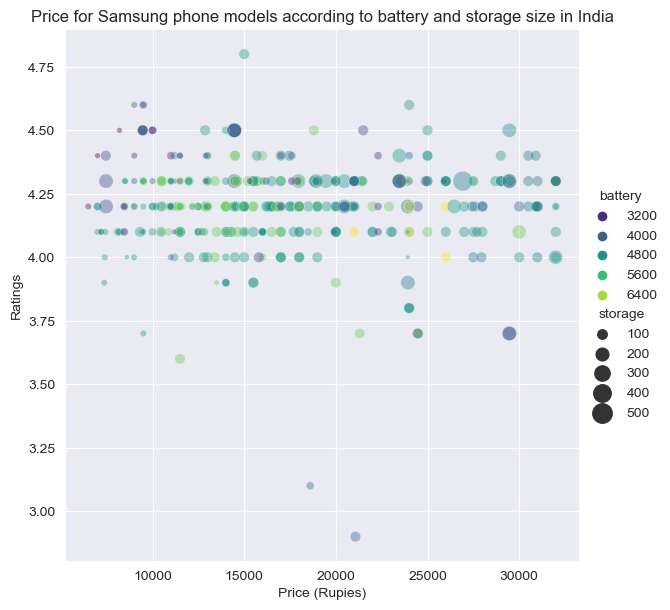

In [39]:
# Bubble chart to visualize ratings, price and capacity in terms of battery and storage 

# Set style
sns.set_style("darkgrid")

plt.figure(figsize=(16, 6))

# Use the scatterplot function to build the bubble map
sns.relplot(x = 'price', y = 'ratings', hue = 'battery', size = 'storage',
            sizes = (10, 200), edgecolors='black', alpha = 0.4, palette = 'viridis',
            height = 6, data = df_sams)

#Setting lables for x and y axis
plt.ylabel('Ratings')
plt.xlabel('Price (Rupies)')


#Setting title
plt.title("Price for Samsung phone models according to battery and storage size in India")


plt.show()

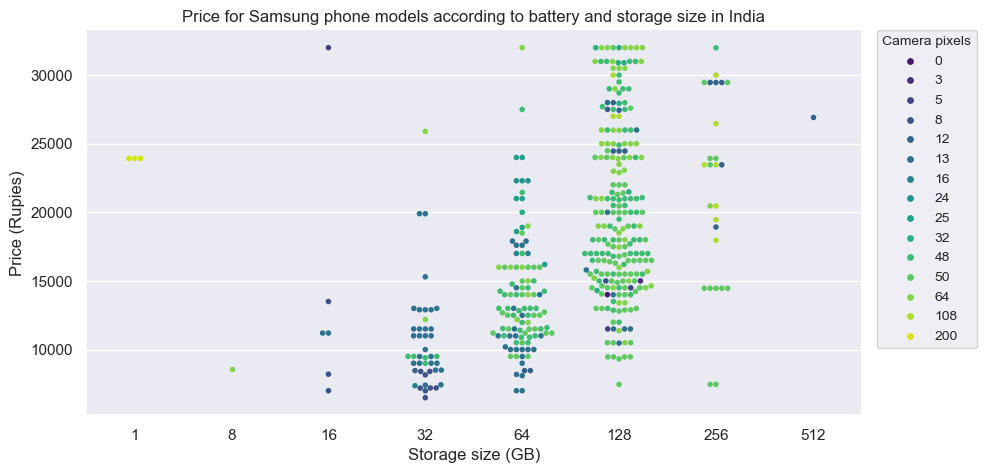

In [40]:
#Setting style
sns.set_style("whitegrid")

# Figure size
sns.set(rc={"figure.figsize":(10, 5)})


#Using swarmplot function
sns.swarmplot(data=df_sams, x="storage", y="price", hue= 'camera', palette = 'viridis', s=4)

#Removing top and right spine from plot 
sns.despine(left=False, bottom=False)

#Setting lables for x and y axis
plt.ylabel("Price (Rupies)")
plt.xlabel('Storage size (GB)')

# Setting legend
plt.legend(title='Camera pixels', fontsize='10', title_fontsize='10', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, markerscale=0.5)

#Setting title
plt.title("Price for Samsung phone models according to battery and storage size in India")

#Show plot
plt.show()

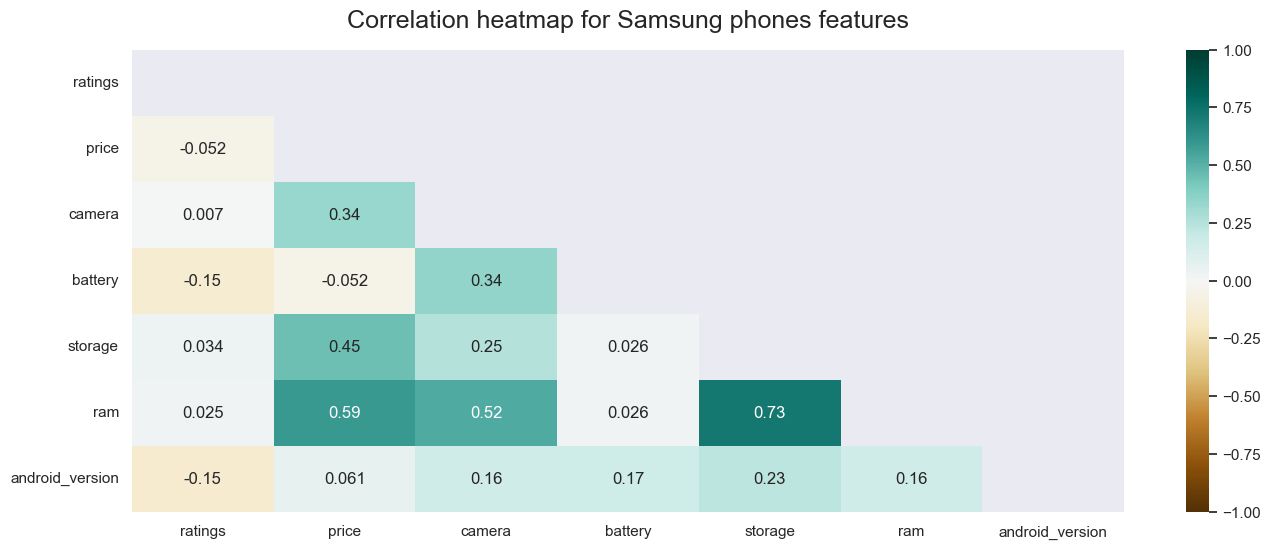

In [41]:
# Correlogram to check possible correlation between phone features

# Figure size
plt.figure(figsize=(16, 6))

# Define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df_sams.corr(), dtype=bool))
heatmap = sns.heatmap(df_sams.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

# Set title
heatmap.set_title('Correlation heatmap for Samsung phones features', fontdict={'fontsize':18}, pad=16);

We can see in the correlogram above that there is a positive correlation between RAM and pricing, meaning if your phone has more RAM, the price is also more expensive. Also the phones with more RAM also has more storage and better camera (more pixels).